In [ ]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data =  '/content/drive/MyDrive/Marketing_Analysis/Data/marketing_data.csv'
df = pd.read_csv(data)

In [ ]:
print(df.shape)
df.head()

(2240, 28)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


# 1. Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [ ]:
df.rename(columns={' Income ':'Income'}, inplace=True)

In [ ]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In income column there are 24 nulls, 1.07% of the data.

In [ ]:
df.dropna(inplace=True)

In [ ]:
print(df.isnull().sum())

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64


In [ ]:
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,...,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.150271,0.009477
std,3249.376275,11.985554,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,...,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.357417,0.096907
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,1959.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8421.750000,1977.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


-count
- mean
- standard deviation
- maximum
- minimum
-percentiles (25%, 50%, 75%)

In [ ]:
df.describe(include='object')

,Education,Marital_Status,Income,Dt_Customer,Country
count,2216,2216,2216,2216,2216
unique,5,8,1974,662,8
top,Graduation,Married,"$7,500.00",8/31/12,SP
freq,1116,857,12,12,1093


We have to replace the column Income to type float and remove the "$" and Dt_Customer column to type date.

In [ ]:
df['Income'] = df['Income'].str.replace("[$,]","").astype(float)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

<ipython-input-14-b79d612f25f5>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Income'] = df['Income'].str.replace("[$,]","").astype(float)


In [ ]:
print(df.shape)
df.head()

(2216, 28)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP


# 2. Exploratory Data Analysis (EDA)

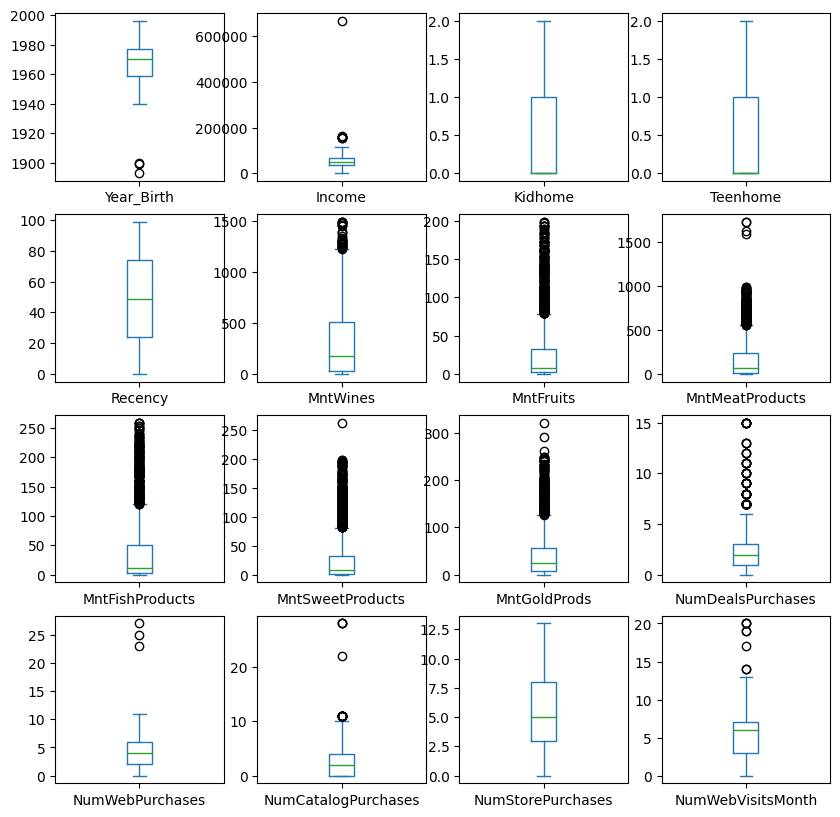

In [ ]:
df_plot = df.select_dtypes(include='number').columns
df_plot = df_plot.drop(['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
                                  'AcceptedCmp5', 'Response', 'Complain'])
df[df_plot].plot(subplots=True, layout= (4,4), kind='box', figsize = (10,10))
plt.show()

we can see that we have outliers in both column year of birth and income. individuals born before 1900 (meaning they would be over 100 years old, which is implausible) and one person earning more than $600,000.  so we need to drop them.

In [ ]:
df = df.drop(df[df['Year_Birth'] <=1900].index)
df= df.drop(df[df['Income']>600000].index)

In [ ]:
import datetime
df['Age'] = datetime.date.today().year - df['Year_Birth']

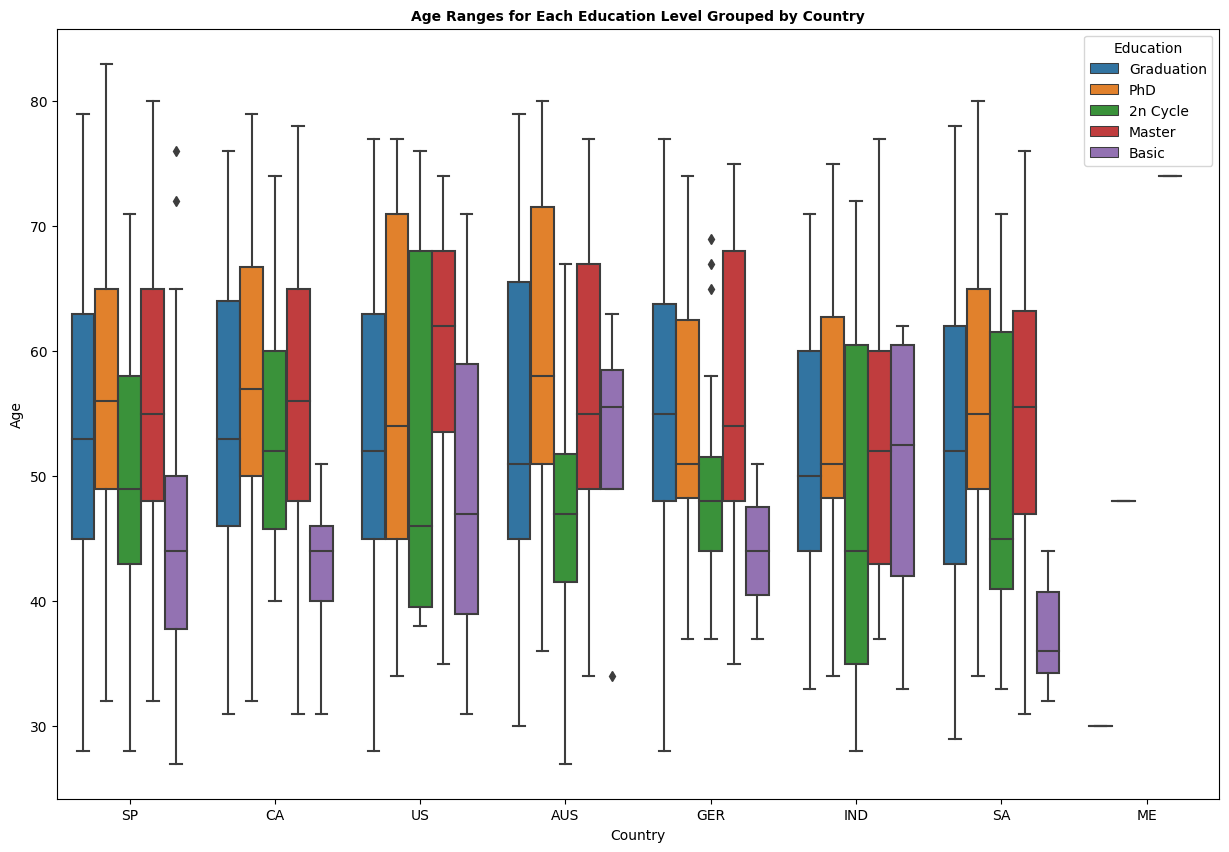

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Country', y='Age', hue='Education',data=df)
plt.title("Age Ranges for Each Education Level Grouped by Country", fontdict={'fontweight':'bold','fontsize':10})
plt.show()

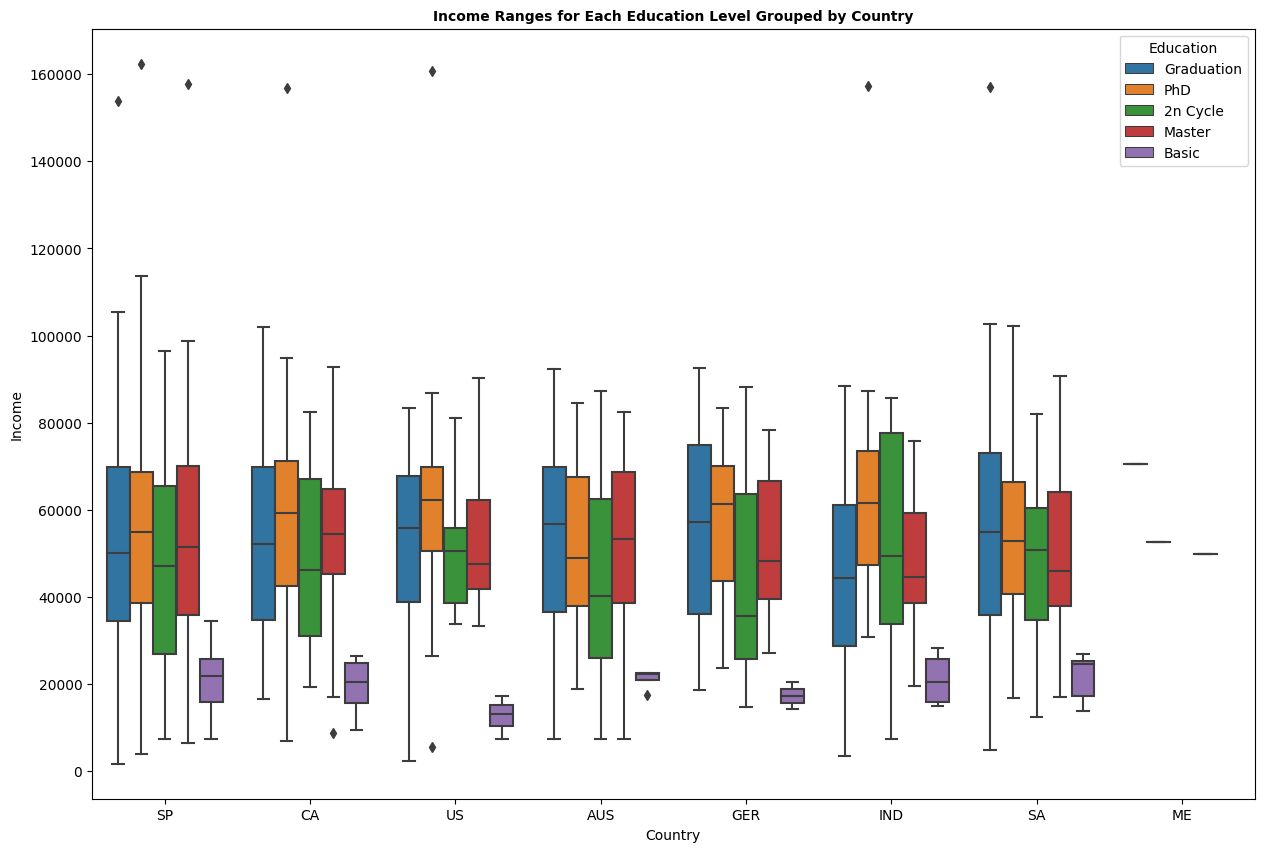

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Country', y='Income', hue='Education',data=df)
plt.title("Income Ranges for Each Education Level Grouped by Country", fontdict={'fontweight':'bold','fontsize':10})
plt.show()

In [ ]:
df['Education'].value_counts()

Graduation    1115
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: Education, dtype: int64

In [ ]:
df['Marital_Status'].value_counts()

Married     857
Together    571
Single      470
Divorced    231
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

Together, alone,yolo, and absurd does not have anything to do with marital status. so we will put together and alone as single. and absurd and yolo will be classified as the mode of the values.

In [ ]:
df['Marital_Status'].mode()

0    Married
Name: Marital_Status, dtype: object

In [ ]:
new_marital = { 'Married':'Married', 'Together':'Single', 'Single':'Single', 'Divorced':'Divorced',
               'Widow':'Widow', 'Alone':'Single', 'YOLO':'Married',  'Absurd':'Married'}

df['New_Marital_Status'] = df['Marital_Status'].map(new_marital)

In [ ]:
print(df['New_Marital_Status'].isnull().sum())
df['New_Marital_Status'].value_counts()

0


Single      1044
Married      861
Divorced     231
Widow         76
Name: New_Marital_Status, dtype: int64

In [ ]:
# Total number of dependents in the household
df['Dependents'] = df['Kidhome'] + df['Teenhome']

<ipython-input-27-8ba7a3ba5289>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.drop('ID', axis=1).corr()


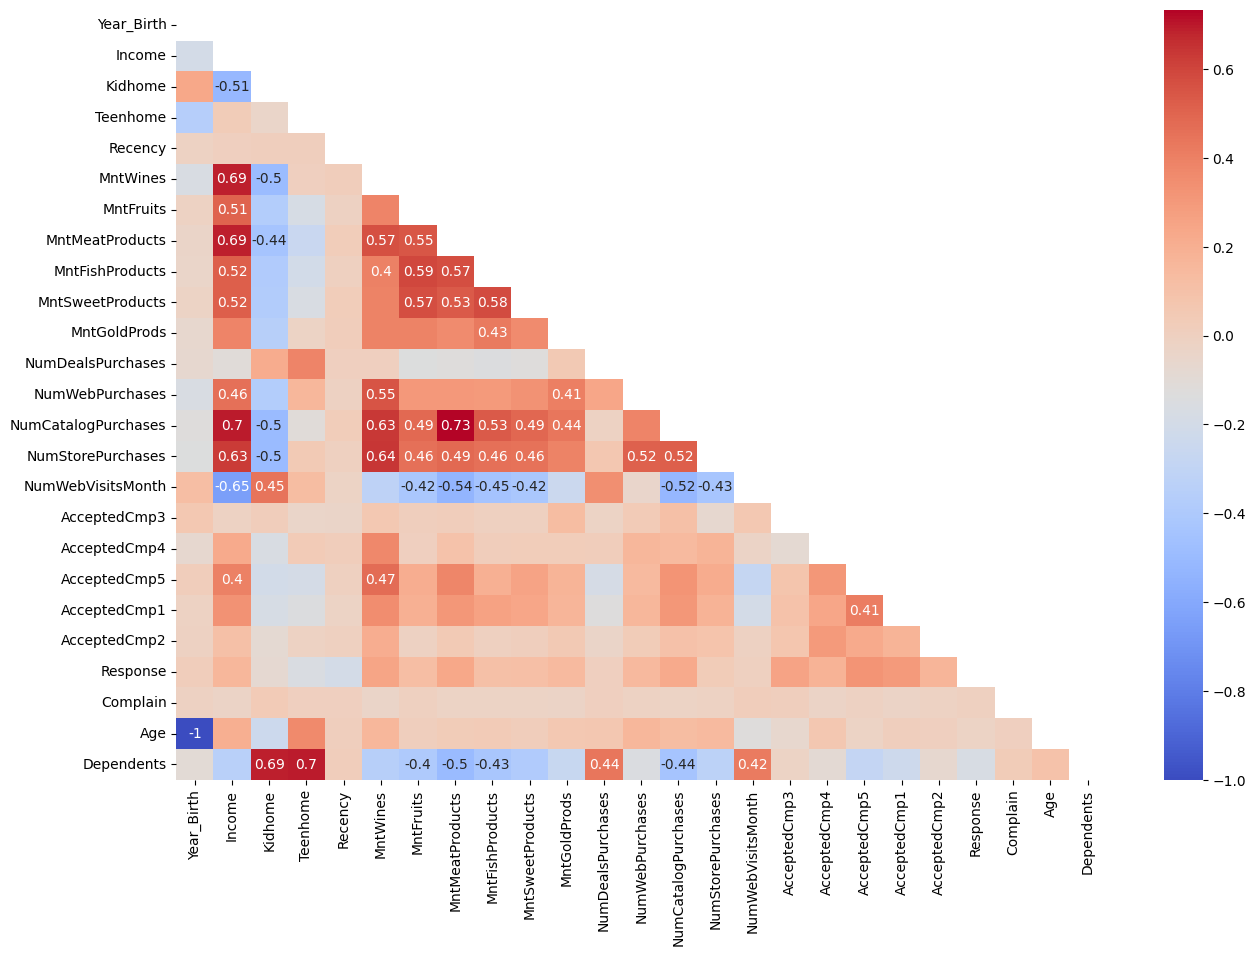

In [ ]:
fig = plt.figure(figsize=(15,10))

corr = df.drop('ID', axis=1).corr()

matrix = np.triu(corr)
ax = sns.heatmap(corr, annot=True, cmap='coolwarm', mask=matrix)
for t in ax.texts:
    if abs(float(t.get_text()))>=0.4:
        t.set_text(t.get_text())
    else:
        t.set_text("")
plt.show()

From these analyses we can conclude that People who order from catalog are more likely to buy one or more of the items. Compared to other items, those who shop in stores are less likely to buy gold products.The target audience for marketing campaign number five was either wealthy individuals or wine lovers. The aspects of marketing campaigns 1 and 5 are comparable in that they primarily targeted the same kind of constumers.

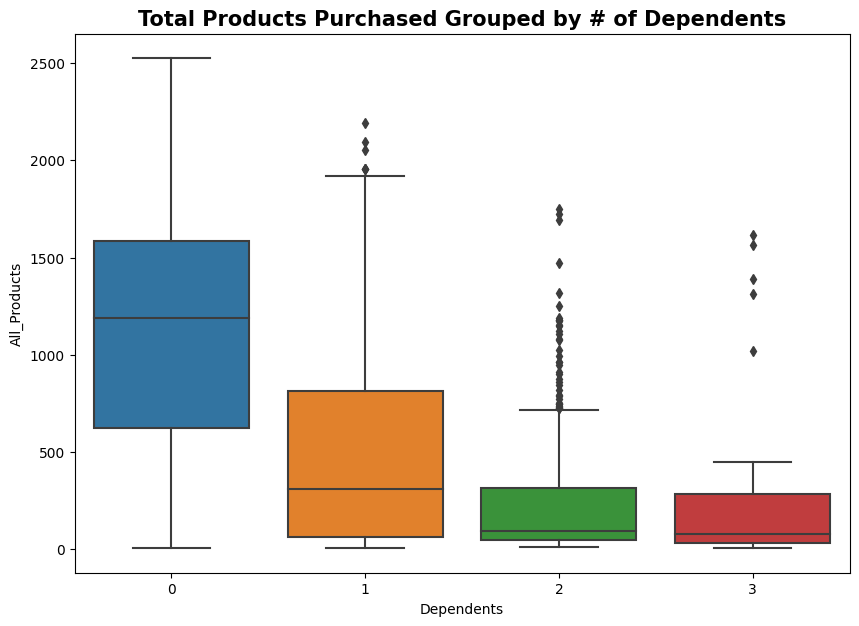

In [ ]:
df['All_Products'] = df[['MntWines', 'MntFruits','MntMeatProducts',
                              'MntFishProducts', 'MntSweetProducts','MntGoldProds']].sum(axis=1)
plt.figure(figsize=(10,7))
sns.boxplot(x='Dependents', y='All_Products', data=df)
plt.title("Total Products Purchased Grouped by # of Dependents", fontdict={'fontsize':15,'fontweight':'bold'})
plt.show()


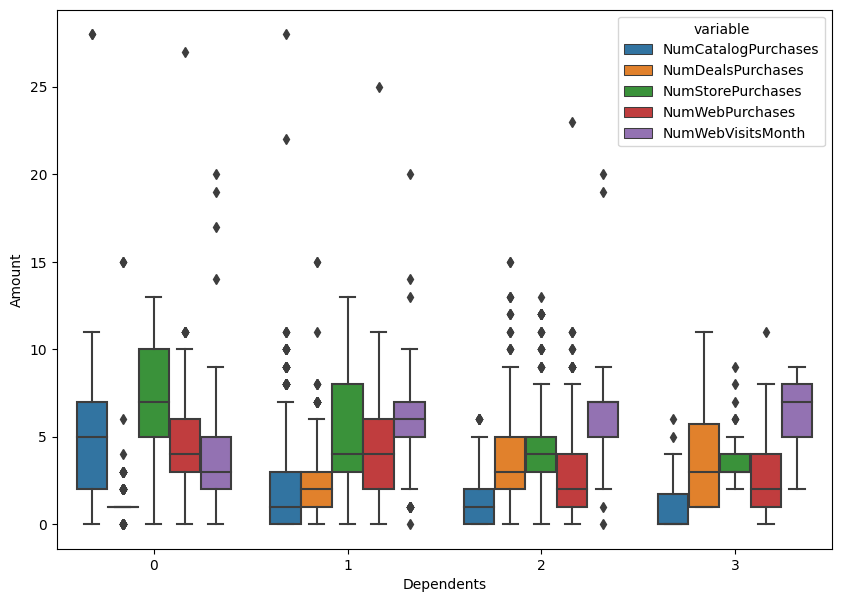

In [ ]:
purchases = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases',
                 'NumStorePurchases', 'NumWebVisitsMonth']
data = pd.melt(df,
             id_vars='ID',
             value_vars=purchases,
             value_name='Amount')

dependents_df = df[['ID','Dependents']]

purch_v_depend = data.merge(dependents_df, how='inner', left_on='ID', right_on='ID').sort_values('variable')

plt.figure(figsize=(10,7))
sns.boxplot(x='Dependents', y='Amount', hue='variable', data=purch_v_depend)

plt.show()

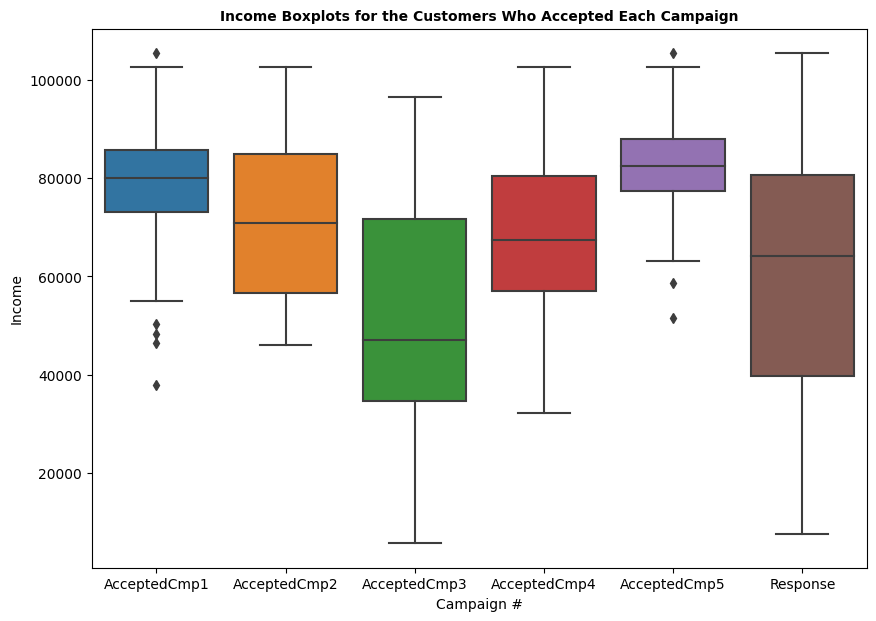

In [ ]:
campaign_cols = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']
data = pd.melt(df,
             id_vars='ID',
             value_vars=campaign_cols,
             var_name='Campaign #')

accepted_cmp_df = data[data['value']==1]
income_df = df[['ID','Income']]

cmp_v_income = accepted_cmp_df.merge(income_df, how='inner', left_on='ID', right_on='ID').sort_values('Campaign #')

plt.figure(figsize=(10,7))
sns.boxplot(x='Campaign #', y='Income', data=cmp_v_income)
plt.title("Income Boxplots for the Customers Who Accepted Each Campaign",
          fontdict={'fontsize':10,'fontweight':'bold'})
plt.show()

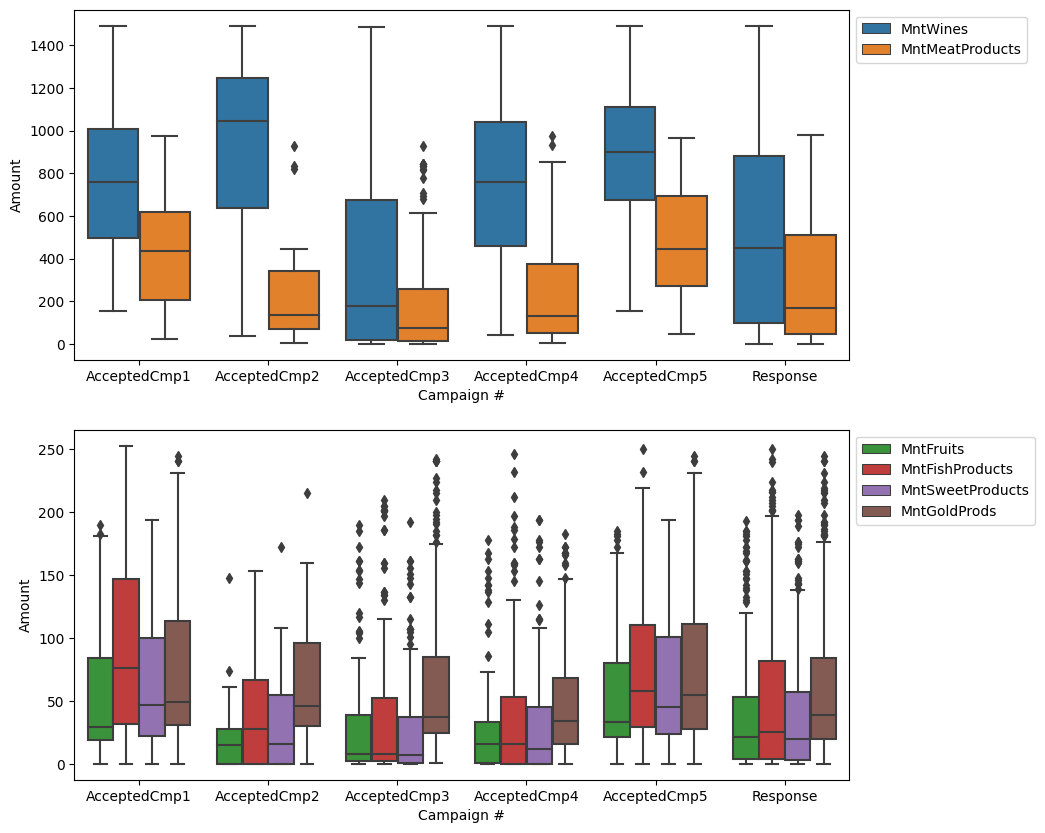

In [ ]:
product_cols = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
campaign_df = df.melt(id_vars='ID',
                        value_vars=campaign_cols,
                        var_name='Campaign #',
                        value_name='Accepted')
product_df = df[['ID', 'MntWines', 'MntFruits',
                   'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']]

cmp_acc_df = campaign_df[campaign_df['Accepted'] == 1]

cmp_v_prod = cmp_acc_df.merge(product_df, how='inner', left_on='ID', right_on='ID').sort_values('Campaign #')
cmp_v_prod
final_cmp_prod = cmp_v_prod.melt(id_vars=['ID', 'Campaign #'],
                                 value_vars=product_cols,
                                 var_name='Product',
                                 value_name='Amount')

meat_wine = final_cmp_prod[final_cmp_prod['Product'].isin(['MntWines', 'MntMeatProducts'])]
all_other_prod = final_cmp_prod[~final_cmp_prod['Product'].isin(['MntWines', 'MntMeatProducts'])]

fig, axes = plt.subplots(2,1,figsize=(10,10))

sns.boxplot(x='Campaign #', y='Amount', hue='Product', data=meat_wine,
            ax=axes[0])
sns.boxplot(x='Campaign #', y='Amount', hue='Product', data=all_other_prod,
            palette=['tab:green','tab:red', 'tab:purple','tab:brown'],
            ax=axes[1])
axes[0].legend(bbox_to_anchor=(1,1))
axes[1].legend(bbox_to_anchor=(1,1))

plt.show()

# 3. Statistical Analysis


# 3.1What aspects of store purchases are strongly correlated?

<ipython-input-32-8c9d4782633f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['NumStorePurchases'], kde=False,hist=True, bins=12)


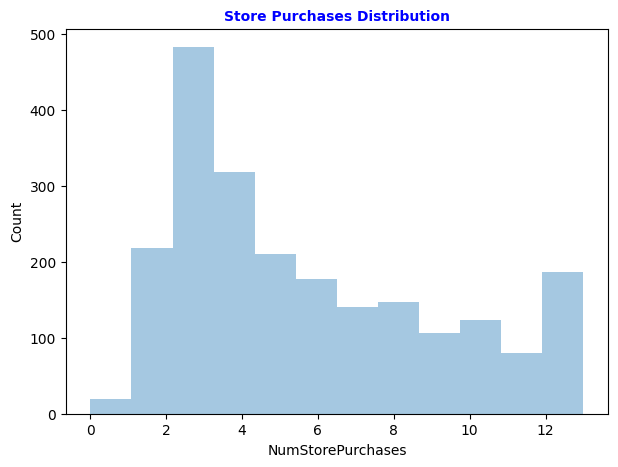

In [ ]:
plt.figure(figsize=(7,5))
sns.distplot(df['NumStorePurchases'], kde=False,hist=True, bins=12)
plt.title("Store Purchases Distribution", size=10, fontweight='bold', color='blue')
plt.ylabel("Count")
plt.show()

In [ ]:
df2 = df.copy()
df2 = df2.drop(['ID','Year_Birth','Education','Marital_Status','Kidhome','Teenhome','Dt_Customer'], axis=1)

In [ ]:
df2.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,New_Marital_Status,Dependents,All_Products
0,84835.0,0,189,104,379,111,189,218,1,4,...,0,0,0,1,0,SP,53,Divorced,0,1190
1,57091.0,0,464,5,64,7,0,37,1,7,...,0,0,1,1,0,CA,62,Single,0,577
2,67267.0,0,134,11,59,15,2,30,1,3,...,0,0,0,0,0,US,65,Married,1,251
3,32474.0,0,10,0,1,0,0,0,1,1,...,0,0,0,0,0,AUS,56,Single,2,11
4,21474.0,0,6,16,24,11,0,34,2,3,...,0,0,0,1,0,SP,34,Single,1,91


In [ ]:
categorical_df = df2.select_dtypes(exclude='number')

dummy_df = pd.DataFrame()
for col in categorical_df.columns:
    dummy = pd.get_dummies(categorical_df[col], prefix=col)
    dummy_df = pd.concat([dummy_df, dummy], axis=1)

df2 = pd.concat([df2, dummy_df], axis=1)
df2.drop(categorical_df.columns, axis=1, inplace=True)

In [ ]:
df2.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US,New_Marital_Status_Divorced,New_Marital_Status_Married,New_Marital_Status_Single,New_Marital_Status_Widow
0,84835.0,0,189,104,379,111,189,218,1,4,...,0,0,0,0,1,0,1,0,0,0
1,57091.0,0,464,5,64,7,0,37,1,7,...,0,0,0,0,0,0,0,0,1,0
2,67267.0,0,134,11,59,15,2,30,1,3,...,0,0,0,0,0,1,0,1,0,0
3,32474.0,0,10,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
4,21474.0,0,6,16,24,11,0,34,2,3,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df2[df2.drop('NumStorePurchases',axis=1).columns],
                                                    df2['NumStorePurchases'],
                                                    test_size=0.3,
                                                    random_state=42)
x_test = sm.add_constant(x_test)
model = sm.OLS(y_test, x_test).fit()
predictions = model.predict(x_test)

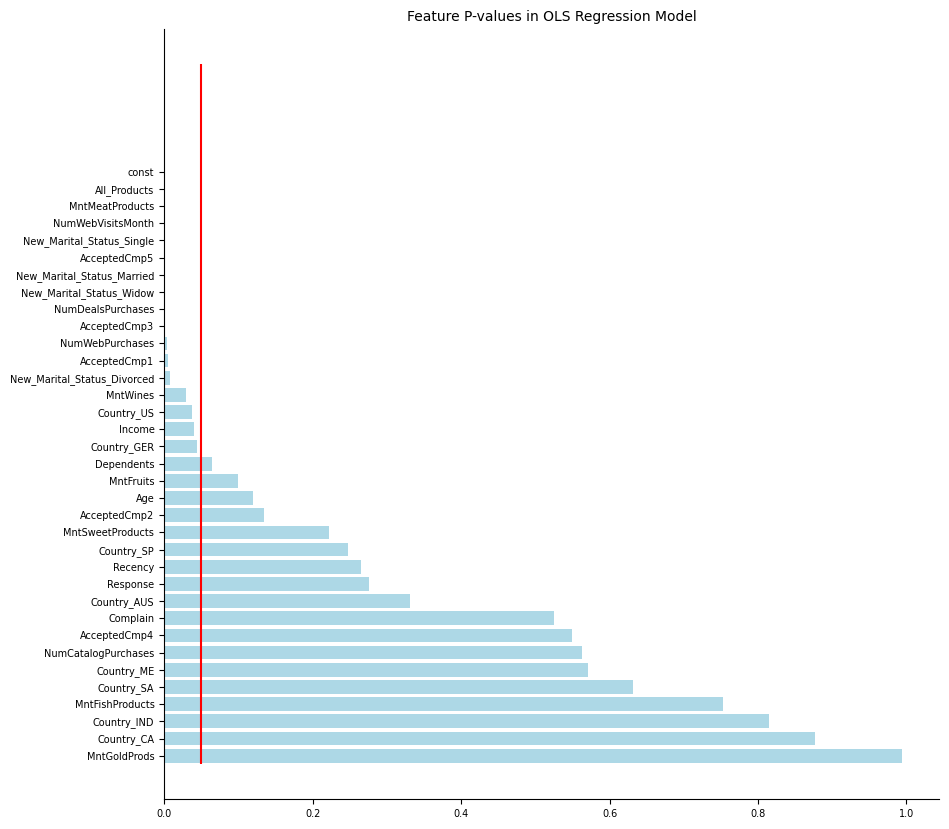

In [ ]:
p_values = pd.Series(model.pvalues).sort_values(ascending=False)

plt.figure(figsize=(10,10))
plt.barh(y=p_values.index, width=p_values, color='lightblue',)
plt.vlines(x=0.05, ymin=-0.5, ymax=40.25, colors='red')
sns.despine(right=True)
plt.title("Feature P-values in OLS Regression Model", size=10)
plt.yticks(size=7)
plt.xticks(size=7)


plt.show()

In [ ]:
p_values = pd.Series(model.pvalues)
p_values[p_values < 0.05].drop('const').sort_values()

All_Products                   3.484810e-11
MntMeatProducts                1.596633e-07
NumWebVisitsMonth              1.812971e-07
New_Marital_Status_Single      1.190403e-06
AcceptedCmp5                   8.259892e-06
New_Marital_Status_Married     9.509824e-06
New_Marital_Status_Widow       1.263127e-04
NumDealsPurchases              8.712167e-04
AcceptedCmp3                   1.091206e-03
NumWebPurchases                4.141172e-03
AcceptedCmp1                   4.828179e-03
New_Marital_Status_Divorced    8.537148e-03
MntWines                       3.002451e-02
Country_US                     3.694676e-02
Income                         4.062423e-02
Country_GER                    4.484059e-02
dtype: float64

The recommendation is to develop strategies to draw more individuals to our website in order to improve the number of in-store transactions. Because income was a big factor, we can dig further into what items each income class purchased and enhance our approach for selling those specific products to our target customers.

# 3.2 Are US total purchases much higher than those of the rest of the countries?




<ipython-input-40-6ca7af00c7ee>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_products = df.groupby('Country').sum().sort_values('All_Products', ascending=False)


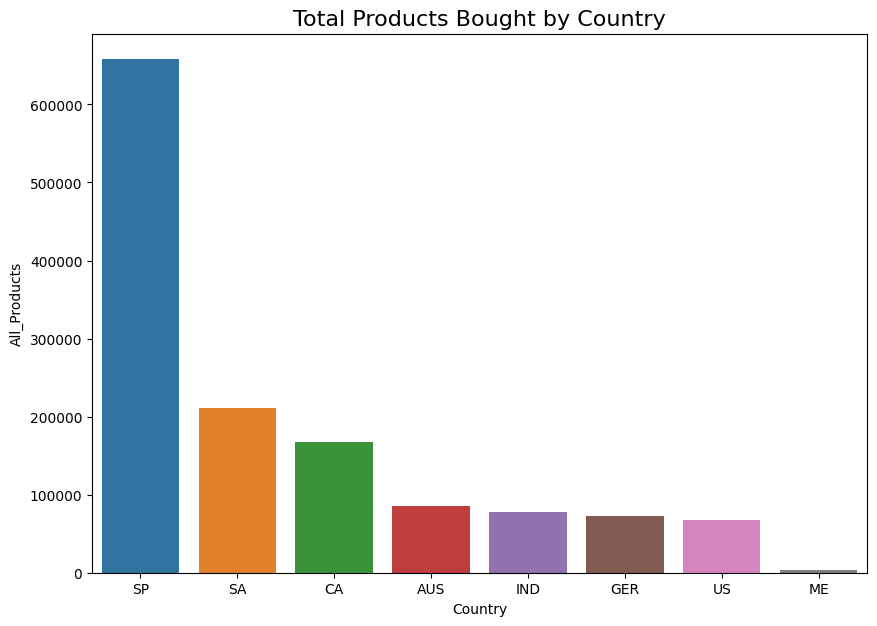

In [ ]:
total_products = df.groupby('Country').sum().sort_values('All_Products', ascending=False)

fig = plt.figure(figsize=(10,7))
sns.barplot(x=total_products.index, y=total_products["All_Products"])
plt.title("Total Products Bought by Country", size=16)

plt.show()

For recommendations we could go deeper into the market in the US and see their sales.

# 3.3 Do "Married PhD People" and the quantity spent on fish have a meaningful relationship?

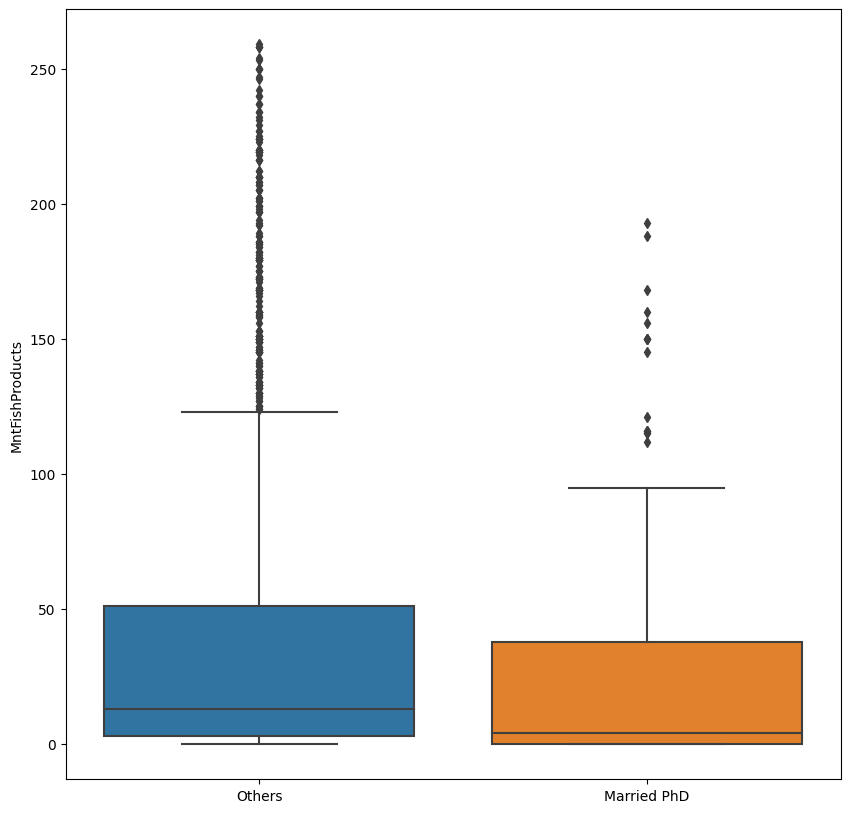

In [ ]:
def change_marital_status(df):
    if df['Education'] == 'PhD':
        if df['New_Marital_Status'] == 'Married':
            return 'Married PhD'
        else:
            return 'Others'
    else:
        return 'Others'
phd_married = df.copy()
phd_married['Changed_Marital_Status'] = phd_married.apply(change_marital_status, axis=1)

fig = plt.figure(figsize=(10,10))

sns.boxplot(x='Changed_Marital_Status', y='MntFishProducts', data=phd_married)
plt.xlabel("")

plt.show()

In [ ]:
all_features = df2.drop('MntFishProducts',axis=1).columns
target = 'MntFishProducts'
x_train, x_test, y_train, y_test = train_test_split(df2[all_features],
                                                    df2[target],
                                                    test_size=0.3,
                                                    random_state=42)
lr = LinearRegression()

lr.fit(x_train, y_train)
test_predictions = lr.predict(x_test)
mse = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(mse)
score = lr.score(x_test, y_test)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"Score: {score}")

MSE: 1.134866533400773e-25
RMSE: 3.36877801791803e-13
Score: 1.0


In [ ]:
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance
def permutation(x_train, x_test, y_train, y_test):

    model = LinearRegression()
    model.fit(x_train, y_train)

    permuter = PermutationImportance(
        estimator = model,
        scoring = 'r2',
        n_iter = 5,
        random_state = 42)

    permuter.fit(x_test, y_test)

    columns = x_test.columns.to_list()
    feature_importance = permuter.feature_importances_

    results = eli5.show_weights(
        estimator = permuter,
        top = 6,
        feature_names = columns
    )
    return results
permutation(x_train, x_test, y_train, y_test)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107730 sha256=682eddf0fe732a5ff9372de9d017739604ec72db0fe75c5692b4a729a85a7ce1
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


For recommendations we can enhance the sales in these categories by further analyzing the routes through which customers acquire these items.

# 3.4 Is there a connection between a campaign's success and the countries?

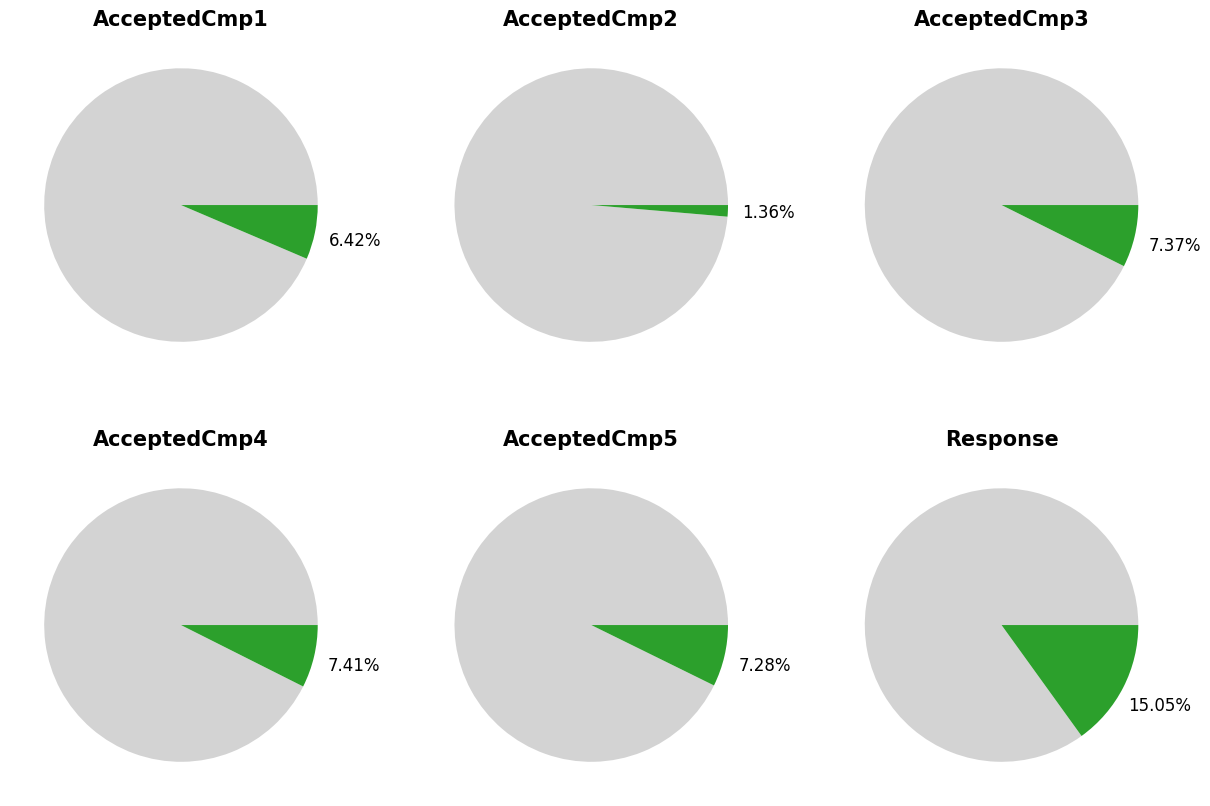

In [ ]:
cmp_cols = ['AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

def my_autopct(pct):
    return ('%.2f%%' % pct) if pct < 50 else ''

rows = 2
cols = 3
fig, axes = plt.subplots(rows,cols, figsize=(15,10))
counter = 0
for i in range(rows):
    for j in range(cols):
        ax = axes[i][j]
        ax.pie(x=df[cmp_cols[counter]].value_counts()/df.shape[0],
               colors=['lightgrey','tab:green'],
               autopct=my_autopct, pctdistance=1.3,
               textprops={'fontsize': 12})
        ax.set_title("{}".format(cmp_cols[counter]), fontdict={'fontsize':15,'fontweight':'bold'})

        counter += 1

plt.show()

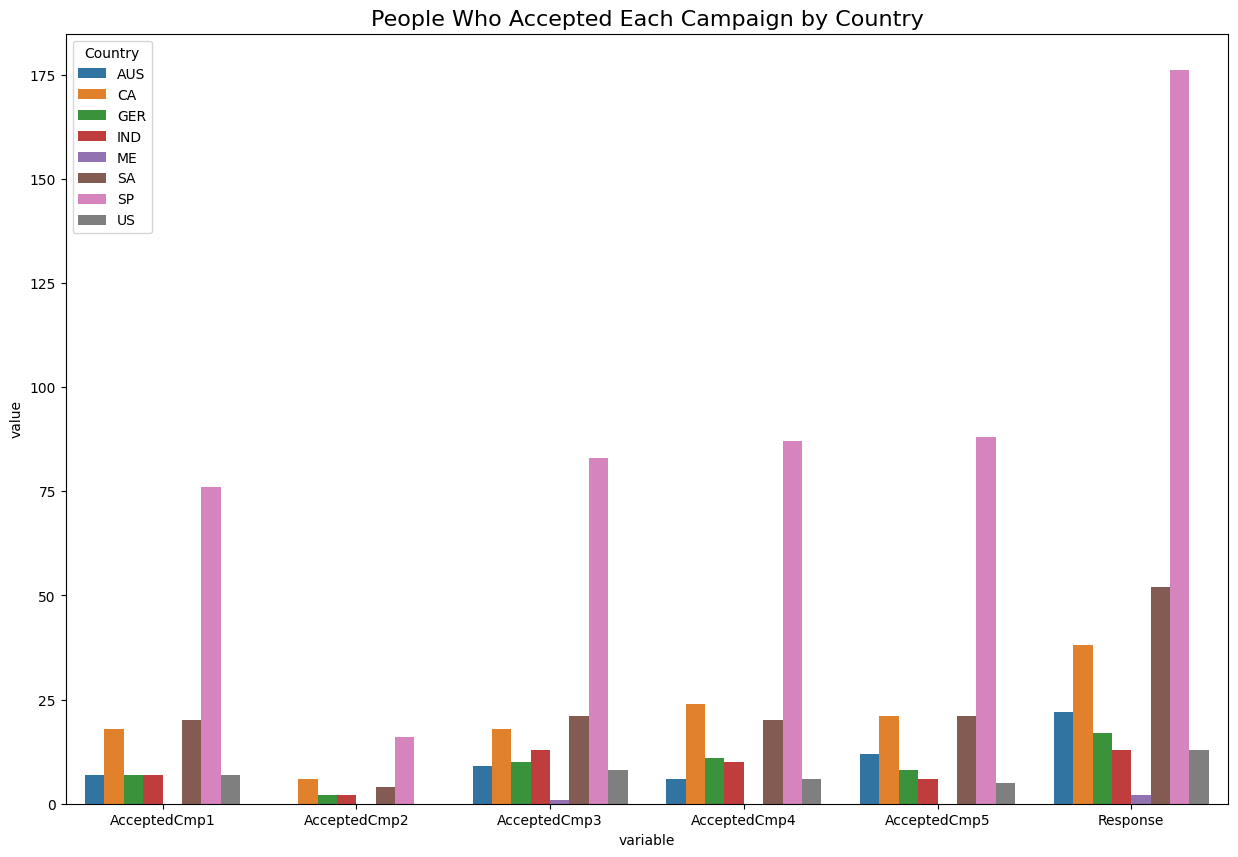

In [ ]:
# Which country accepted the most campaigns?
country_cols = ['Country_AUS', 'Country_CA','Country_GER', 'Country_IND',
                'Country_ME', 'Country_SA', 'Country_SP', 'Country_US']

cmp_melt_df = df.melt(id_vars='ID', value_vars=cmp_cols)
final_melt_df = cmp_melt_df.merge(right=df[['ID','Country']], how='inner', left_on='ID', right_on='ID')
final_df = final_melt_df.groupby(['variable','Country']).sum().reset_index()
plt.figure(figsize=(15,10))
sns.barplot(x='variable', y='value', hue='Country', data=final_df)
plt.title("People Who Accepted Each Campaign by Country", size=16)

plt.show()

For recommendations, we need to put effort on the other countries to make it successful in all countries, not just one.

# 4. Prediction of Marketing Campaign Response (TensorFlow neural network)

---



In [ ]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Income                       2212 non-null   float64
 1   Recency                      2212 non-null   int64  
 2   MntWines                     2212 non-null   int64  
 3   MntFruits                    2212 non-null   int64  
 4   MntMeatProducts              2212 non-null   int64  
 5   MntFishProducts              2212 non-null   int64  
 6   MntSweetProducts             2212 non-null   int64  
 7   MntGoldProds                 2212 non-null   int64  
 8   NumDealsPurchases            2212 non-null   int64  
 9   NumWebPurchases              2212 non-null   int64  
 10  NumCatalogPurchases          2212 non-null   int64  
 11  NumStorePurchases            2212 non-null   int64  
 12  NumWebVisitsMonth            2212 non-null   int64  
 13  AcceptedCmp3      

In [ ]:
# we need to split our data into x which is all the features except response, and y which is the targeted column Response
def train_test(df2):
  x = df2.drop('Response', axis=1)
  y = df2['Response']
  X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, shuffle=True, random_state=1)
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
  X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = train_test(df2)

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1548, 34) (1548,)
(664, 34) (664,)


In [ ]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))
X = tf.keras.layers.Dense(128, activation='relu')(inputs)
X = tf.keras.layers.Dense(128, activation='relu')(X)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(X)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
39/39 [==============================] - 2s 20ms/step - loss: 0.4311 - accuracy: 0.8223 - auc: 0.6487 - val_loss: 0.3049 - val_accuracy: 0.8871 - val_auc: 0.8407
Epoch 2/100
39/39 [==============================] - 0s 3ms/step - loss: 0.3021 - accuracy: 0.8845 - auc: 0.8563 - val_loss: 0.2989 - val_accuracy: 0.8839 - val_auc: 0.8264
Epoch 3/100
39/39 [==============================] - 0s 3ms/step - loss: 0.2713 - accuracy: 0.8926 - auc: 0.8878 - val_loss: 0.2875 - val_accuracy: 0.8871 - val_auc: 0.8448
Epoch 4/100
39/39 [==============================] - 0s 3ms/step - loss: 0.2510 - accuracy: 0.8982 - auc: 0.9046 - val_loss: 0.2851 - val_accuracy: 0.8806 - val_auc: 0.8617
Epoch 5/100
39/39 [==============================] - 0s 3ms/step - loss: 0.2450 - accuracy: 0.9055 - auc: 0.9080 - val_loss: 0.3042 - val_accuracy: 0.8806 - val_auc: 0.8255
Epoch 6/100
39/39 [==============================] - 0s 3ms/step - loss: 0.2287 - accuracy: 0.9055 - auc: 0.9240 - val_loss: 0.2934 - 

In [ ]:
results = model.evaluate(X_test, y_test, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))
print("     Test AUC: {:.5f}".format(results[2]))

    Test Loss: 0.30791
Test Accuracy: 87.50%
     Test AUC: 0.85469


21/21 [==============================] - 0s 1ms/step


<ipython-input-53-9b578b3ef959>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = np.array(model.predict(X_test) >= 0.5, dtype=np.int)


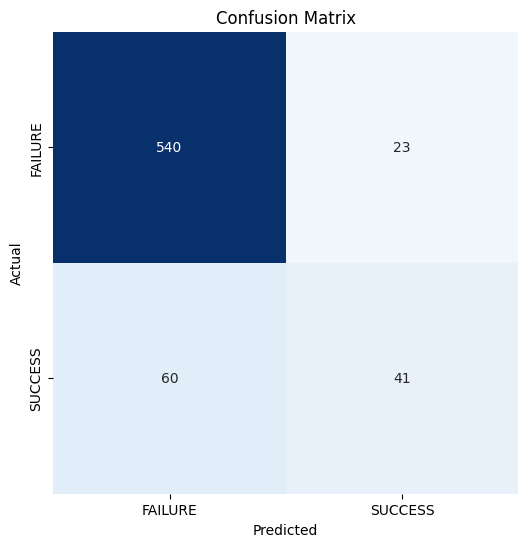

Classification Report:
               precision    recall  f1-score   support

     FAILURE       0.90      0.96      0.93       563
     SUCCESS       0.64      0.41      0.50       101

    accuracy                           0.88       664
   macro avg       0.77      0.68      0.71       664
weighted avg       0.86      0.88      0.86       664



In [ ]:
y_pred = np.array(model.predict(X_test) >= 0.5, dtype=np.int)

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=["FAILURE", "SUCCESS"])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(2) + 0.5, labels=["FAILURE", "SUCCESS"])
plt.yticks(ticks=np.arange(2) + 0.5, labels=["FAILURE", "SUCCESS"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n", clr)